In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [74]:
# Load the dataset
dataset = pd.read_csv("SocialMediaUsersDataset.csv")
dataset

,UserID,Name,Gender,DOB,Interests,City,Country
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela
...,...,...,...,...,...,...,...
99995,99996,Lionel Denault,Female,1983-07-31,'DIY and crafts',Dawan,China
99996,99997,Margie Mieszala,Female,1954-05-20,"'Cars and automobiles', 'Cooking', 'Outdoor ac...",Arcos de la Frontera,Spain
99997,99998,Joan Mercedes,Male,1975-06-06,"'Business and entrepreneurship', 'Cooking'",Los Andes,Chile
99998,99999,Marvin Massa,Female,1959-11-16,"'Gaming', 'Business and entrepreneurship', 'Fa...",Varjota,Brazil


In [61]:
X = dataset['Interests']
y = dataset['Gender']


In [75]:
X

0                  'Movies', 'Fashion', 'Fashion', 'Books'
1        'Gaming', 'Finance and investments', 'Outdoor ...
2          'DIY and crafts', 'Music', 'Science', 'Fashion'
3             'Outdoor activities', 'Cars and automobiles'
4                                    'Politics', 'History'
                               ...                        
99995                                     'DIY and crafts'
99996    'Cars and automobiles', 'Cooking', 'Outdoor ac...
99997           'Business and entrepreneurship', 'Cooking'
99998    'Gaming', 'Business and entrepreneurship', 'Fa...
99999                                   'Politics', 'Pets'
Name: Interests, Length: 100000, dtype: object

In [76]:
y

0        Female
1        Female
2        Female
3          Male
4        Female
          ...  
99995    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: Gender, Length: 100000, dtype: object

In [62]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [77]:
# Vectorize the 'Interests' column using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [78]:
# Train a Naive Bayes classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [79]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

In [80]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [81]:
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.50

Confusion Matrix:
[[5571 4408]
 [5628 4393]]

Classification Report:
              precision    recall  f1-score   support

      Female       0.50      0.56      0.53      9979
        Male       0.50      0.44      0.47     10021

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



C:\Users\Alperen\AppData\Local\Temp\ipykernel_11520\3872245105.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interests_df['Interests'] = interests_df['Interests'].apply(lambda x: [i.strip("' ") for i in x.split(',')])


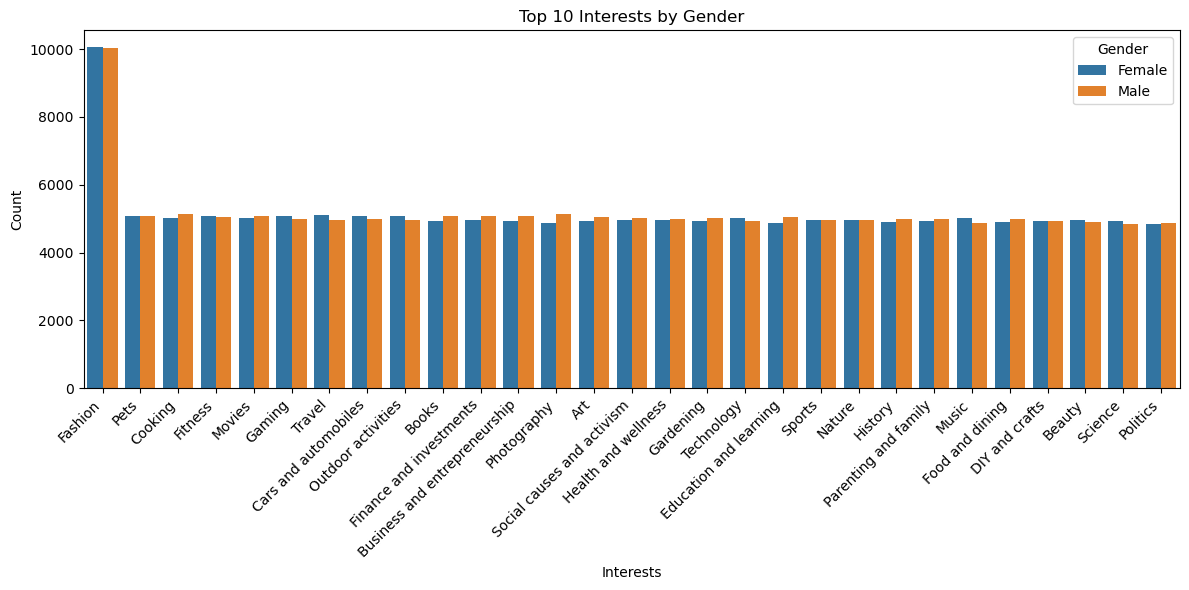

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv("SocialMediaUsersDataset.csv")

# Extract relevant columns
interests_df = dataset[['Gender', 'Interests']]

# Split the interests string into a list of interests
interests_df['Interests'] = interests_df['Interests'].apply(lambda x: [i.strip("' ") for i in x.split(',')])

# Explode the lists to individual rows
interests_df = interests_df.explode('Interests')

# Plot the top interests for each gender
plt.figure(figsize=(12, 6))
sns.countplot(x='Interests', hue='Gender', data=interests_df, order=interests_df['Interests'].value_counts().index[:100])
plt.title('Top 10 Interests by Gender')
plt.xlabel('Interests')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
